In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

from uav_env import *

### **state Space**
$(x, y, p_x, p_y, angle, L, mass, intertia)$ : most simplified

### **observation**
(FOV array)

### **Action space**
(Propulsion (acc in facing angle), angular velocity)
```python
thrust, angular_momentum = action
thrust = np.clip(thrust, 0., 1.)
angular_momentum = np.clip(angular_momentum, -1., 1.) * UAV_ANG_POW
thrust_force = thrust_direction * thrust * UAV_THRUST_POW
```
Note the input of thrust and angular momentum needs to be interpretated as 0-100%, -100%-100%

### **Rewards**
*   increase/decrease the closer/durther the agent is to the goal.
*   increase/decrease the larger/smaller the magnitute of velocity $||v||$.
*   increase/decrease the larger/smaller the $\%$ of obstacle in FOV.

The episode receive an additional reward of -100 for crashing.

An episode is considered a solution if it reaches score.

### **Starting State**
The agent starts at the left ceter of the viewpoirt, with a initial $v_x$

### **Episode Termination**
If:
* The agent crashes
* The agent gets outside of the viewport

raw_reward:  [-3.61718054e-02  0.00000000e+00  9.57073063e-01 -2.98562787e+01
 -2.00000000e-03] 
reward:  -130.01999626174373
[ 0.50437495  0.53033092  0.62344146  0.85809422  1.63219134  6.36081696
  7.34835818 10.          6.39714766  6.93245525 10.         10.
  3.83369857  3.76950206  5.16608574 10.          1.63219134  0.85809345
  0.62344202  0.53033151]
state:  [ 0.          0.          0.         -0.03617181 -0.13485895  0.9495625
  0.94696691  0.93765585  0.91419058  0.83678087  0.3639183   0.26516418
  0.          0.36028523  0.30675448  0.          0.          0.61663014
  0.62304979  0.48339143  0.          0.83678087  0.91419066  0.9376558
  0.94696685]
0.0 28.2521458748571 -0.13485894919059893


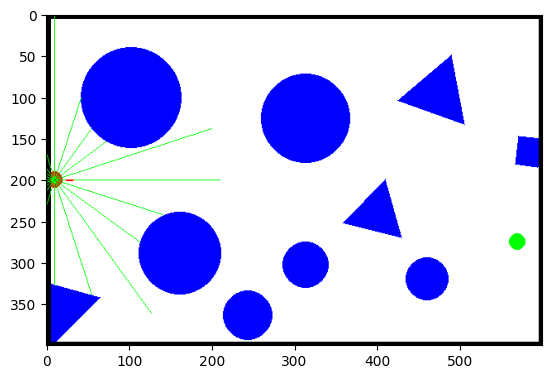

In [2]:
env = SimpleUAVEnv()
env.reset()
total_steps = 10  # Total number of steps in the test
thrust_increment = 1  # Increment in thrust per step
angular_momentum = 0  # Constant angular momentum (for simplicity)

# Run the test
for step in range(total_steps):
    # Gradually increase thrust
    thrust = thrust_increment 

    # Create the action (thrust, angular momentum)
    action = 1

    # Perform a step in the environment
    state, reward, done, raw_reward = env.step(action)

    # Render the current state
    frame = env.render()

    # Break the loop if the episode is done
    if done:
        break

    # Pause for a short time to see the animation
    time.sleep(0.1)

# Close the environment
env.close()
print('raw_reward: ', raw_reward, '\nreward: ', reward)
print(env._get_obs())
print('state: ', state)
print(env.uav.angle,env.dist2goal, env.ang2goal)
plt.imshow(frame)

#raw_reward = np.array((distance_reward/REW_DIST2GOAL,  velocity_reward/REW_VEL, angle_reward/REW_ANGLE, fov_reward, act_reward))

In [3]:
fov_reward = 0
print('OBS Offset: ', OBS_OFFSET, 'UAV Radius: ', UAV_RADIUS)
for distance in env._get_obs():
    print('distance: ', distance, ' PEN: ', env._leakyrelu_penalty(distance, offset=OBS_OFFSET, max_penalty=PEN_COLLISION)*PEN_OBSTACLE)

OBS Offset:  1.5 UAV Radius:  0.5
distance:  0.5043749511241913  PEN:  -99.56250488758087
distance:  0.5303309249068913  PEN:  -96.96690750931087
distance:  0.6234414583225992  PEN:  -87.65585416774007
distance:  0.8580942201606324  PEN:  -64.19057798393676
distance:  1.6321913438833744  PEN:  0.0001321913438833744
distance:  6.360816955566406  PEN:  0.004860816955566406
distance:  7.348358179882198  PEN:  0.005848358179882198
distance:  10.0  PEN:  0.0085
distance:  6.397147662075733  PEN:  0.004897147662075734
distance:  6.93245524771189  PEN:  0.00543245524771189
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  3.833698571290312  PEN:  0.002333698571290312
distance:  3.769502063846474  PEN:  0.002269502063846474
distance:  5.166085738097188  PEN:  0.003666085738097188
distance:  10.0  PEN:  0.0085
distance:  1.6321913438833744  PEN:  0.0001321913438833744
distance:  0.858093448621968  PEN:  -64.1906551378032
distance:  0.623442018878257  PEN:  -87.6557981121743

Episode 100	Average Score: -142.79

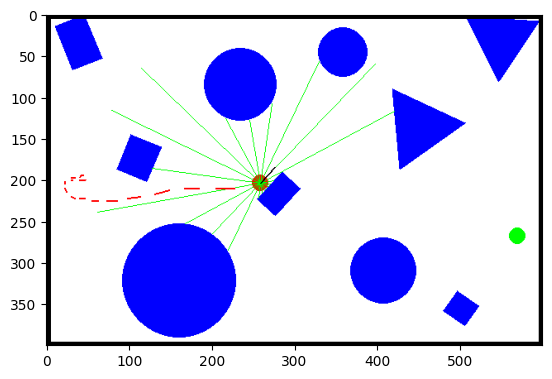

Episode 100	Average Score: -142.79, Eps: 0.606, Terminal vel: 25.689, angle:-0.77, dist2goal: 15.85, ang2goal: 0.56, step: 35
Episode 146	Average Score: -116.00Goal reached! Vel:  14.235250473022461


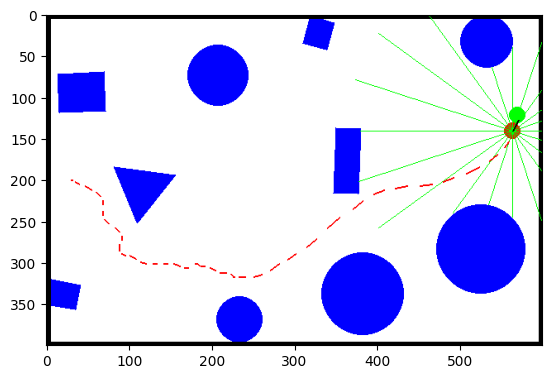

Episode 185	Average Score: -86.594Goal reached! Vel:  14.235250473022461


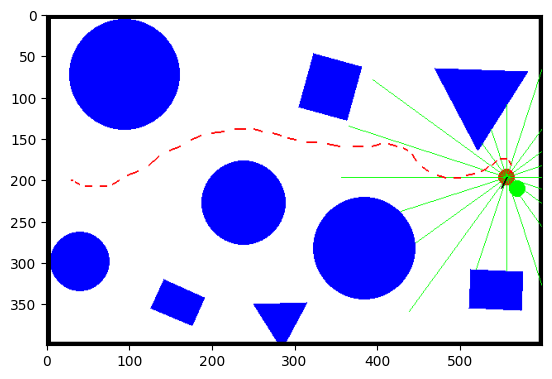

Episode 189	Average Score: -77.41Goal reached! Vel:  22.95365333557129


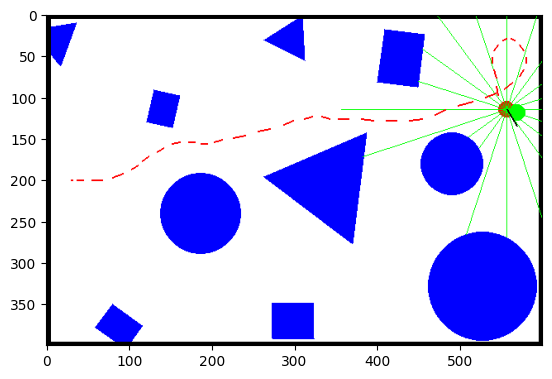

Episode 198	Average Score: -66.56Goal reached! Vel:  22.953651428222656


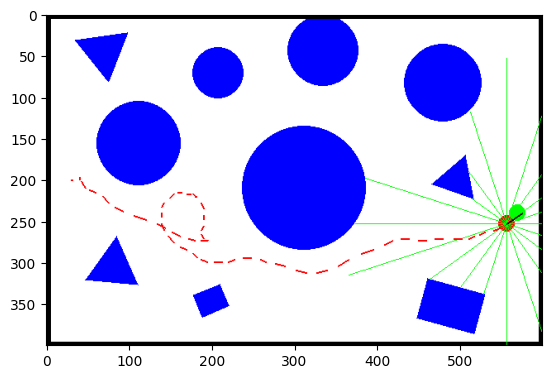

Episode 200	Average Score: -62.33

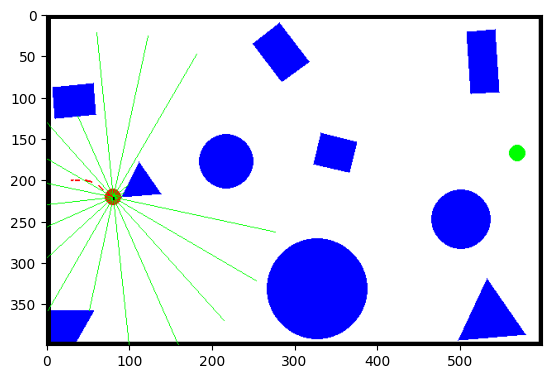

Episode 200	Average Score: -62.33, Eps: 0.367, Terminal vel: 2.999, angle:0.10, dist2goal: 24.55, ang2goal: 0.00, step: 10
Episode 207	Average Score: -61.89Goal reached! Vel:  40.763553619384766


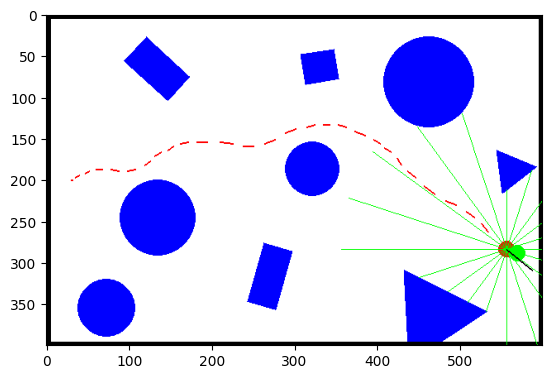

Episode 223	Average Score: -57.77Goal reached! Vel:  14.235252380371094


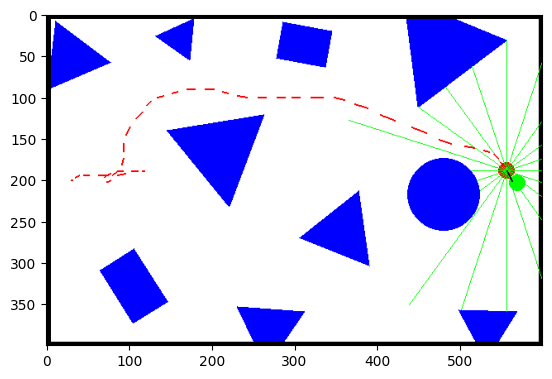

Episode 250	Average Score: -48.32Goal reached! Vel:  14.235254287719727


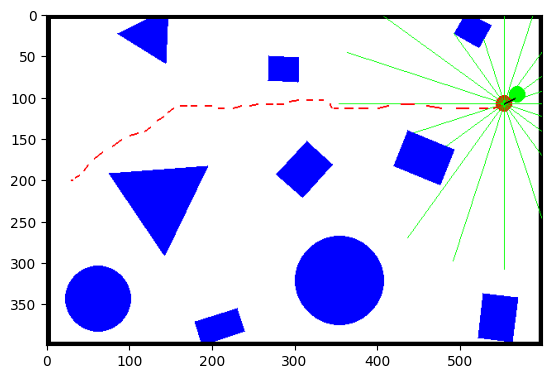

Episode 259	Average Score: -37.83Goal reached! Vel:  14.235250473022461


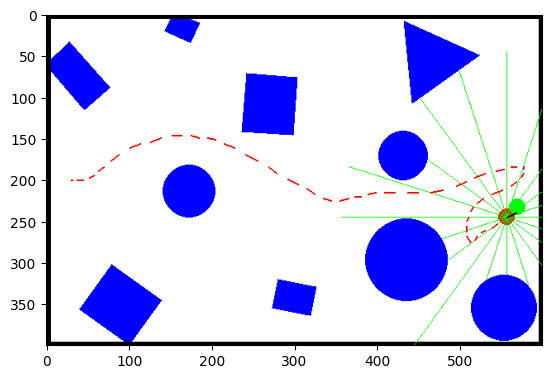

Episode 260	Average Score: -33.41Goal reached! Vel:  20.13168716430664


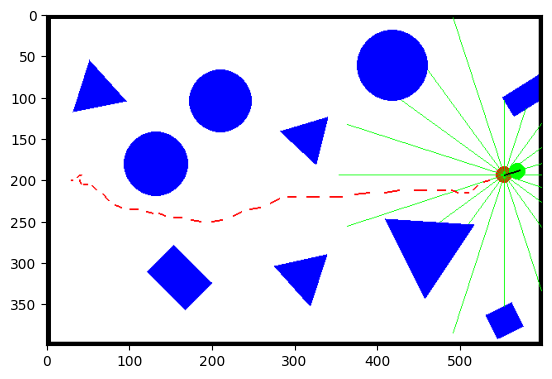

Episode 264	Average Score: -27.28Goal reached! Vel:  26.24850845336914


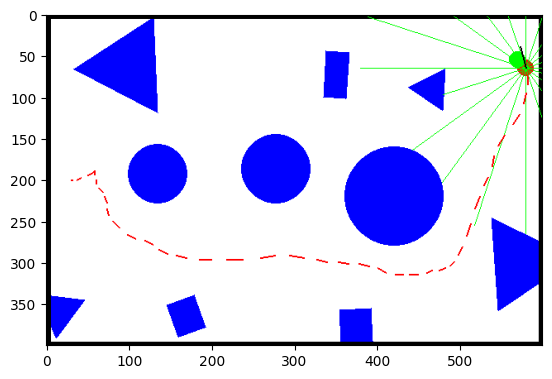

Episode 288	Average Score: -10.11Goal reached! Vel:  6.36619758605957


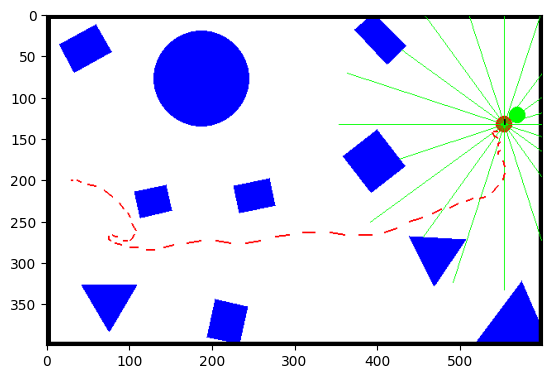

Episode 293	Average Score: -9.986Goal reached! Vel:  40.26337432861328


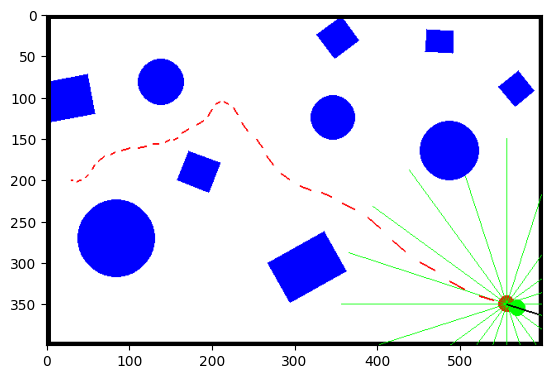

Episode 300	Average Score: -3.23

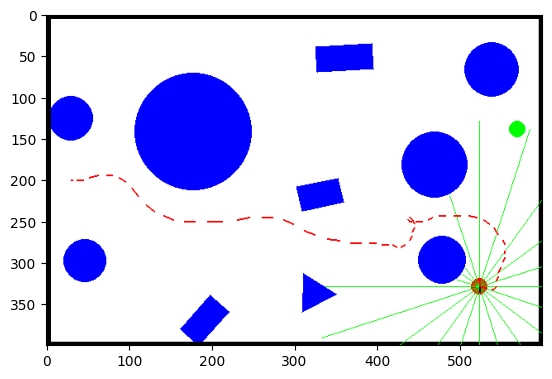

Episode 300	Average Score: -3.23, Eps: 0.222, Terminal vel: 6.366, angle:0.00, dist2goal: 9.81, ang2goal: 1.33, step: 99
Episode 303	Average Score: -4.27Goal reached! Vel:  26.248510360717773


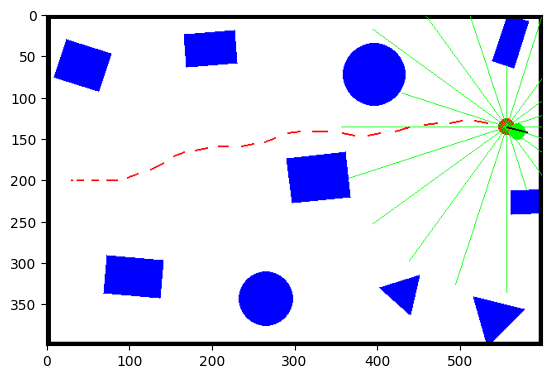

Episode 304	Average Score: -3.92Goal reached! Vel:  6.36619758605957


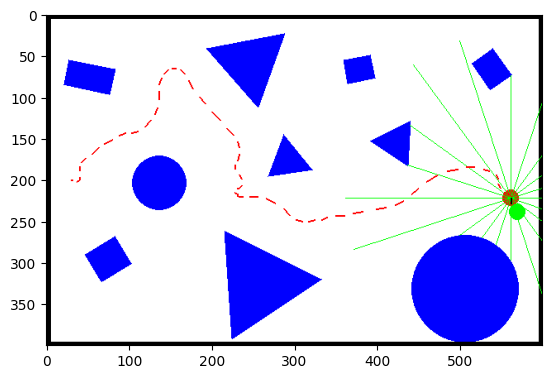

Episode 308	Average Score: 5.148Goal reached! Vel:  12.73239517211914


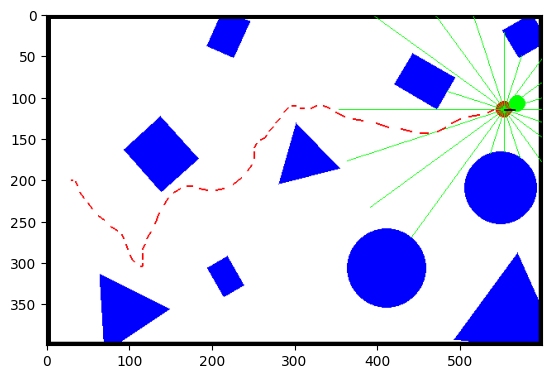

Episode 316	Average Score: 11.40Goal reached! Vel:  18.00632667541504


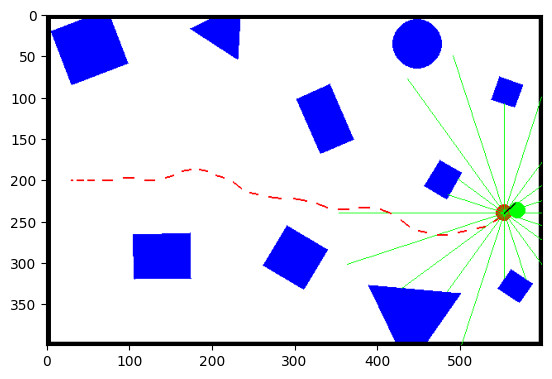

Episode 326	Average Score: 12.26Goal reached! Vel:  18.00632667541504


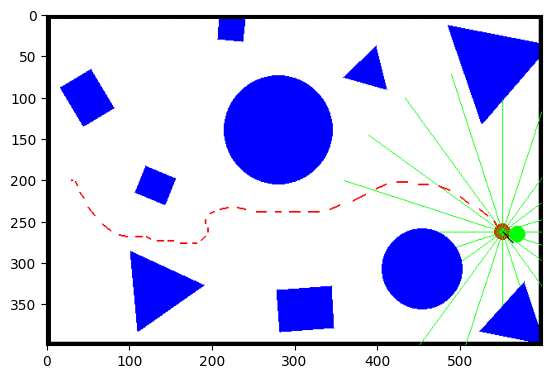

Episode 338	Average Score: 16.19Goal reached! Vel:  14.235252380371094


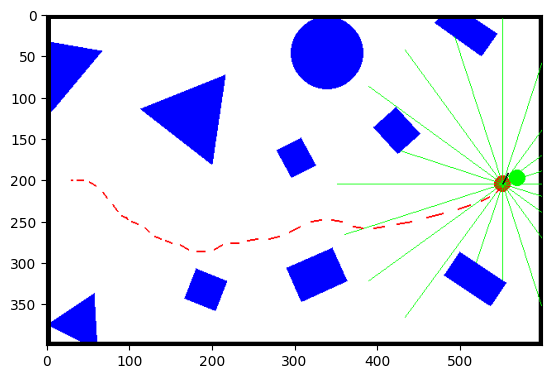

Episode 342	Average Score: 23.28Goal reached! Vel:  22.95365333557129


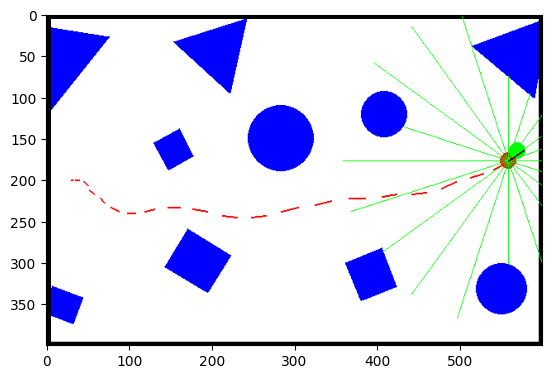

Episode 351	Average Score: 33.62Goal reached! Vel:  9.00316047668457


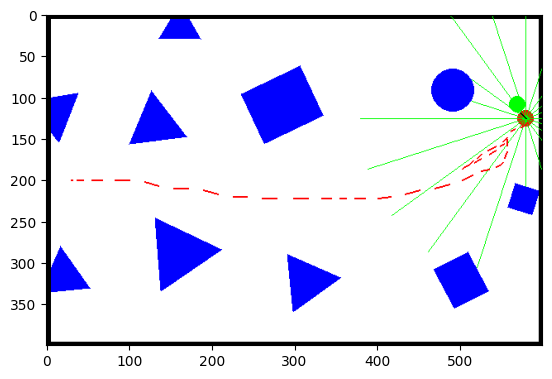

Episode 356	Average Score: 40.49Goal reached! Vel:  14.235254287719727


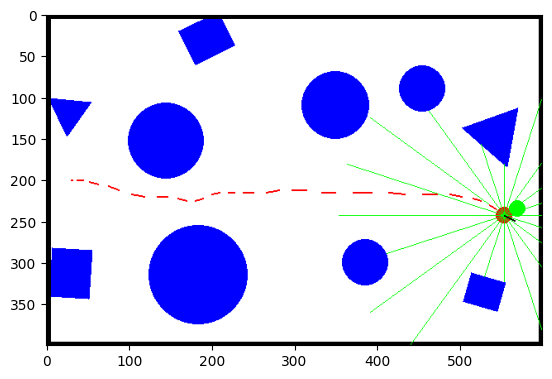

Episode 368	Average Score: 35.89Goal reached! Vel:  22.953649520874023


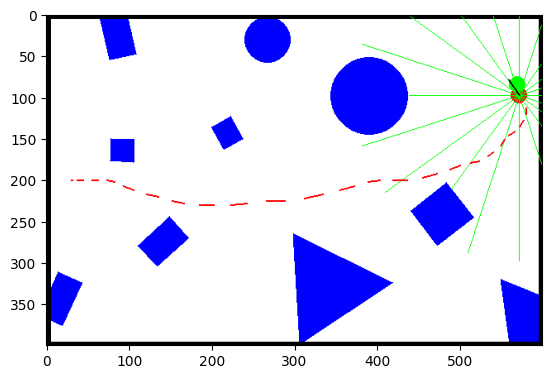

Episode 385	Average Score: 34.48Goal reached! Vel:  9.003165245056152


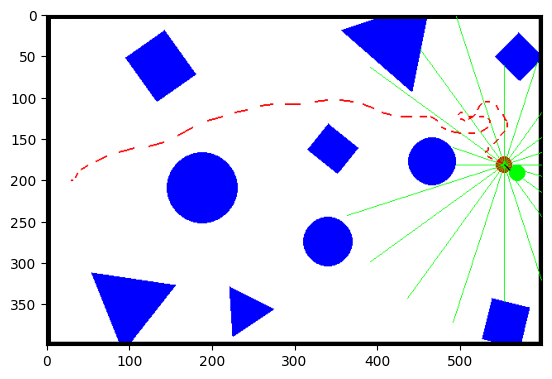

Episode 398	Average Score: 33.86Goal reached! Vel:  6.36619758605957


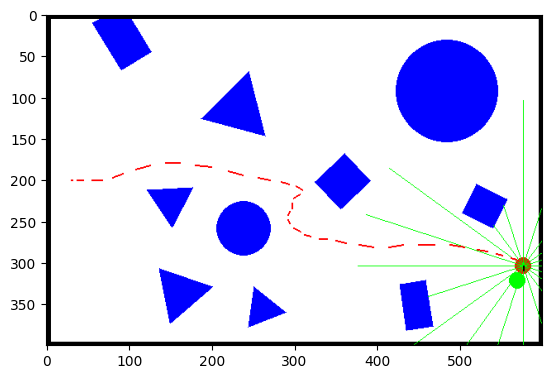

Episode 400	Average Score: 37.55

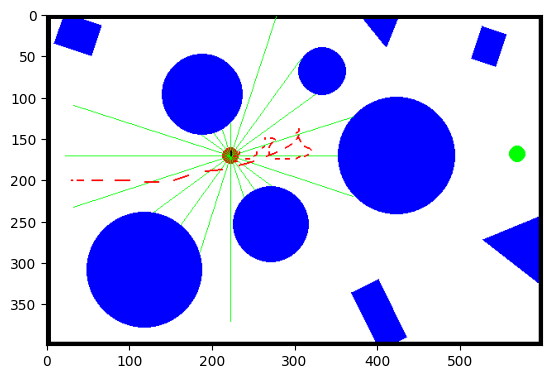

Episode 400	Average Score: 37.55, Eps: 0.135, Terminal vel: 6.366, angle:0.00, dist2goal: 17.32, ang2goal: 0.01, step: 99
Episode 419	Average Score: 40.84Goal reached! Vel:  40.26337432861328


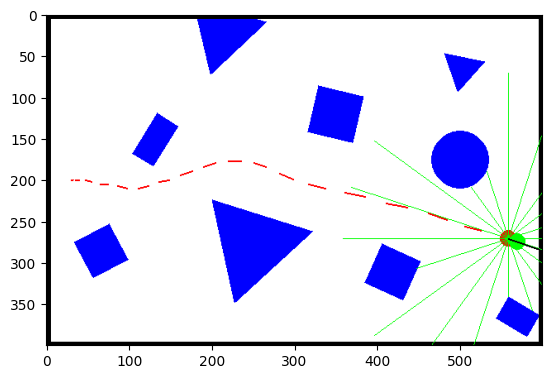

Episode 434	Average Score: 45.52Goal reached! Vel:  14.235252380371094


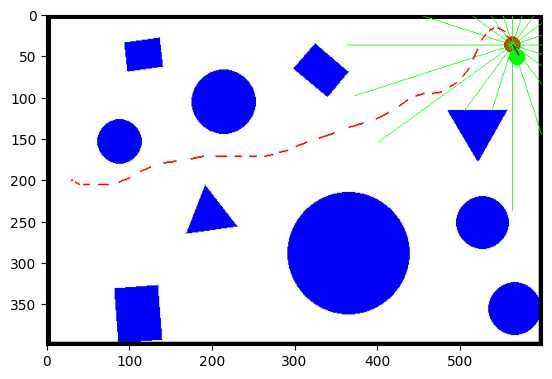

Episode 457	Average Score: 51.70Goal reached! Vel:  20.13168716430664


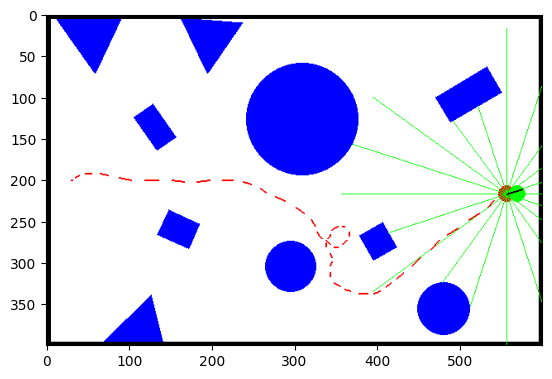

Episode 485	Average Score: 70.13Goal reached! Vel:  12.73239517211914


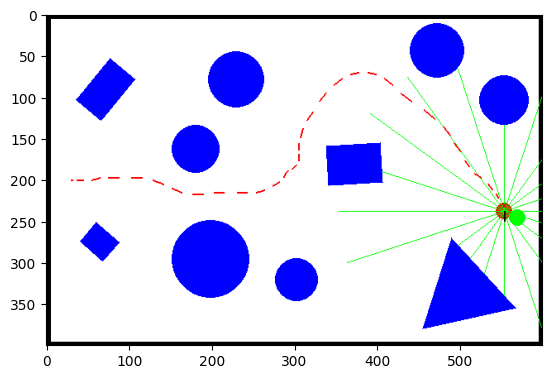

Episode 500	Average Score: 70.03

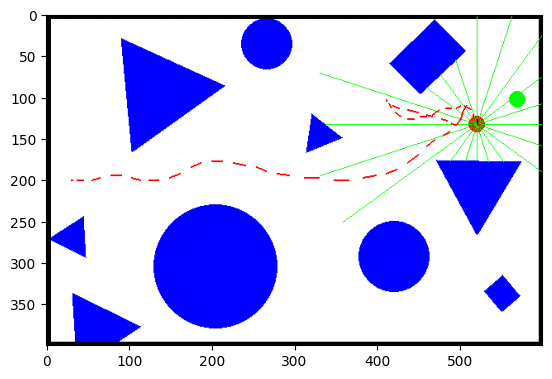

Episode 500	Average Score: 70.03, Eps: 0.082, Terminal vel: 6.366, angle:0.00, dist2goal: 2.85, ang2goal: 0.55, step: 99
Episode 502	Average Score: 71.25Goal reached! Vel:  14.235254287719727


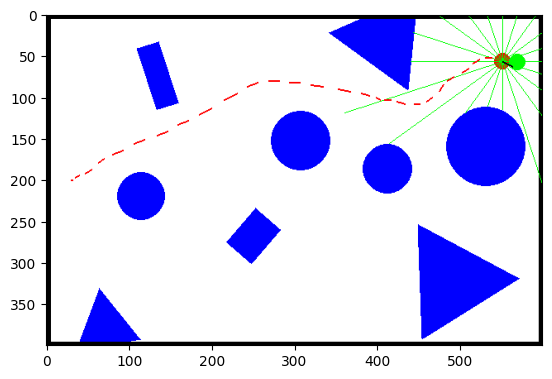

Episode 528	Average Score: 76.87Goal reached! Vel:  14.235252380371094


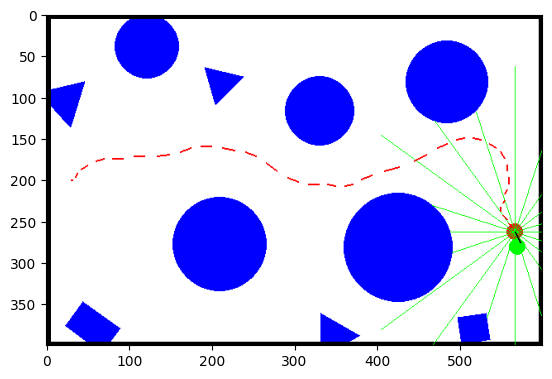

Episode 539	Average Score: 86.58Goal reached! Vel:  14.235250473022461


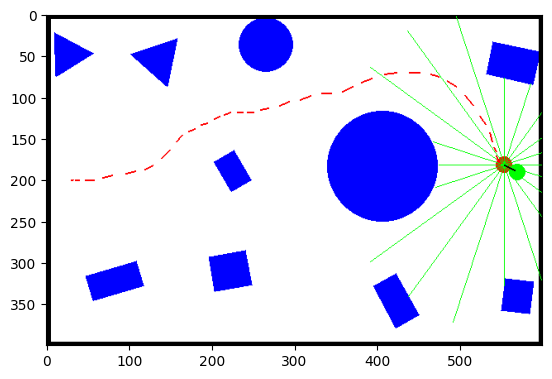

Episode 541	Average Score: 86.49Goal reached! Vel:  9.00316333770752


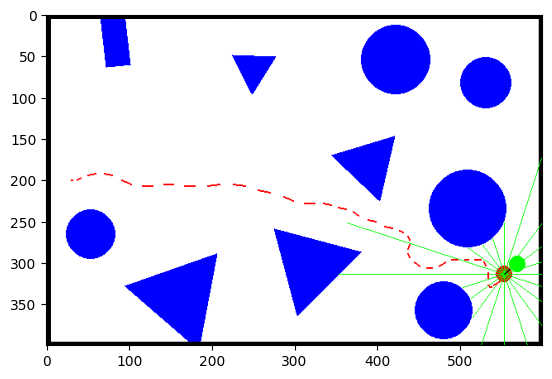

Episode 552	Average Score: 84.14Goal reached! Vel:  20.131685256958008


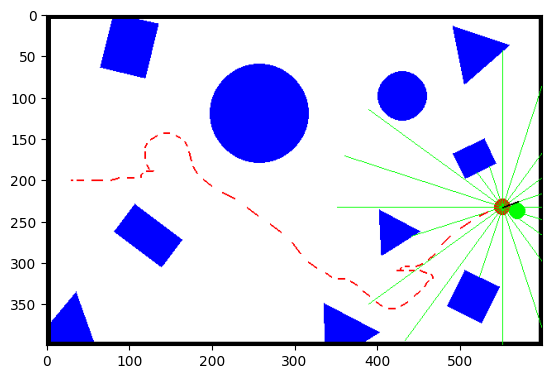

Episode 564	Average Score: 87.82Goal reached! Vel:  38.72407150268555


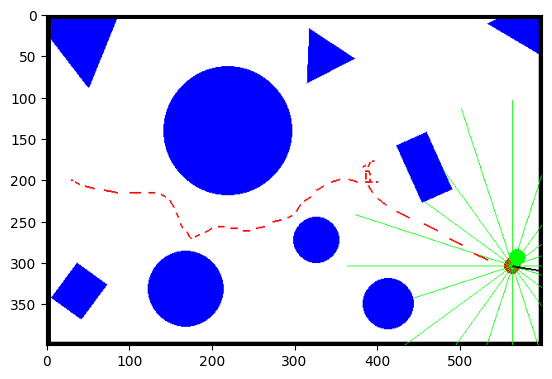

Episode 574	Average Score: 88.01Goal reached! Vel:  40.26337432861328


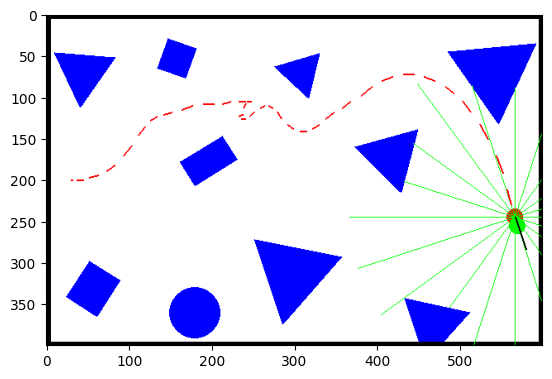

Episode 587	Average Score: 78.78Goal reached! Vel:  9.00316047668457


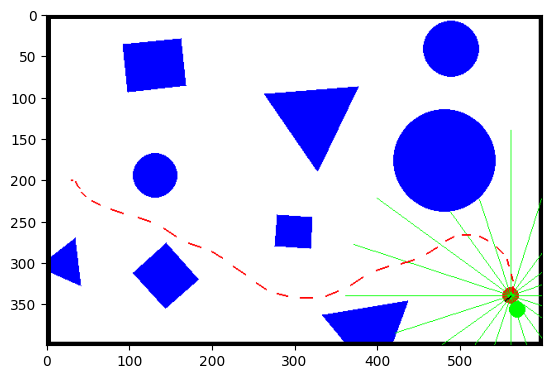

Episode 600	Average Score: 88.04

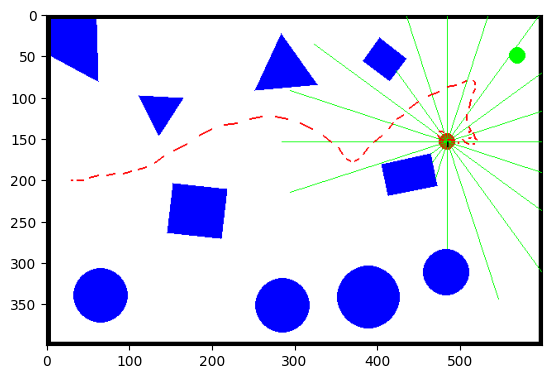

Episode 600	Average Score: 88.04, Eps: 0.049, Terminal vel: 6.366, angle:0.00, dist2goal: 6.69, ang2goal: 0.89, step: 99
Goal reached! Vel:  26.248506546020508


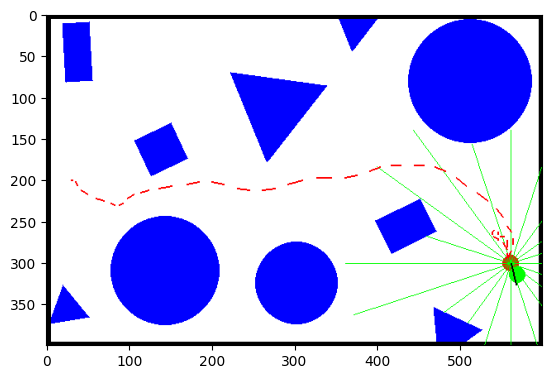

Episode 618	Average Score: 87.54Goal reached! Vel:  20.131685256958008


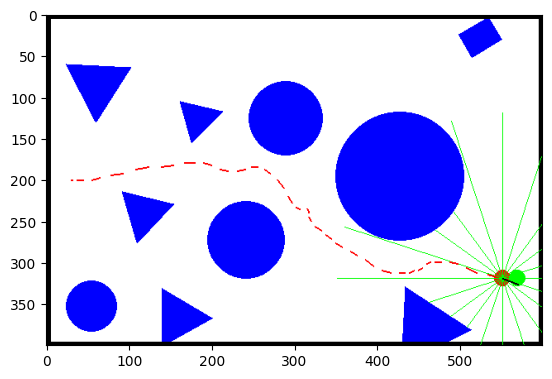

Episode 632	Average Score: 88.84Goal reached! Vel:  6.366201400756836


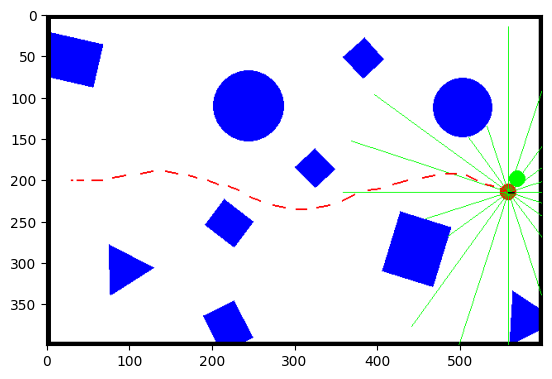

Episode 651	Average Score: 84.73Goal reached! Vel:  20.131685256958008


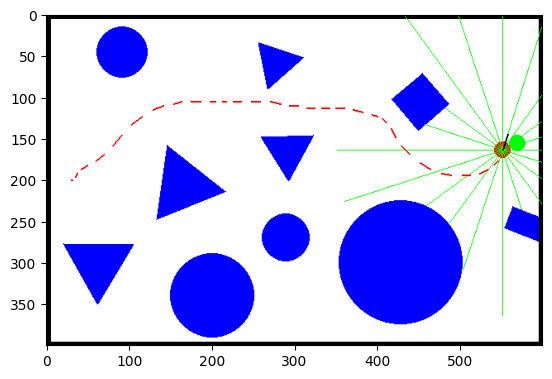

Episode 652	Average Score: 89.89Goal reached! Vel:  18.006322860717773


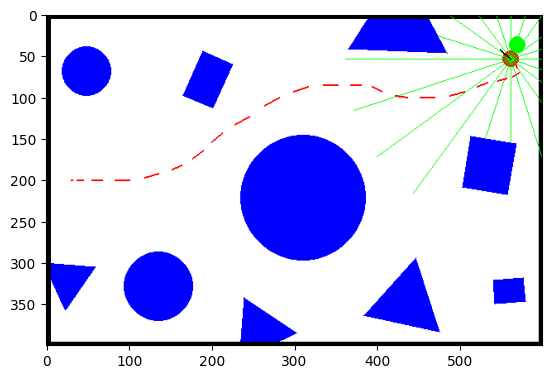

Episode 656	Average Score: 94.96Goal reached! Vel:  28.470504760742188


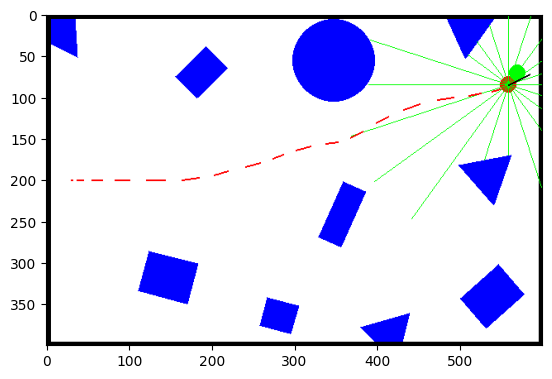

Episode 674	Average Score: 99.192Goal reached! Vel:  14.235254287719727


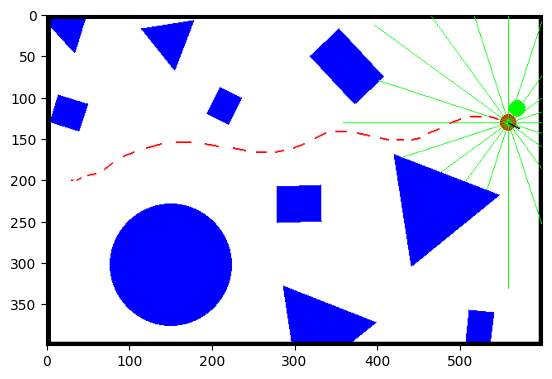

Episode 693	Average Score: 99.940Goal reached! Vel:  18.006328582763672


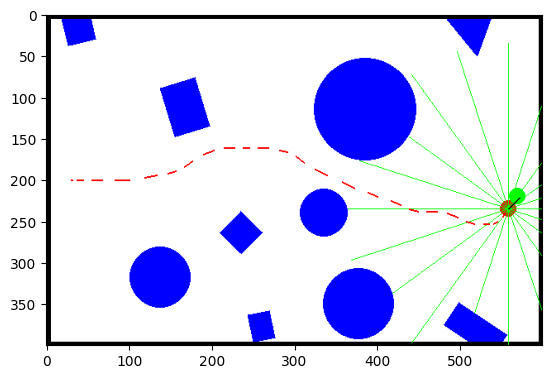

Episode 700	Average Score: 108.00

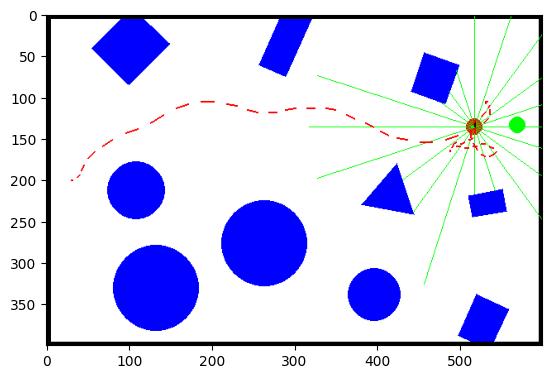

Episode 700	Average Score: 108.00, Eps: 0.030, Terminal vel: 6.366, angle:0.00, dist2goal: 2.55, ang2goal: 0.03, step: 99
Episode 706	Average Score: 106.34Goal reached! Vel:  27.009490966796875


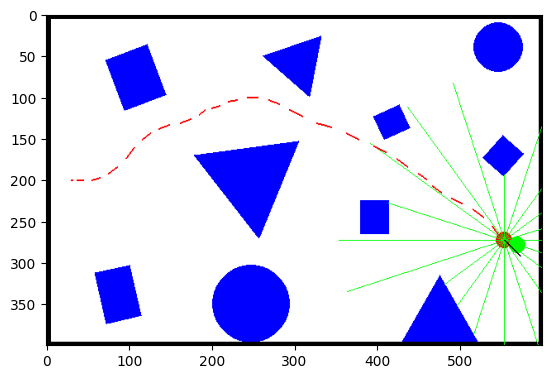

Episode 711	Average Score: 104.06Goal reached! Vel:  19.09859275817871


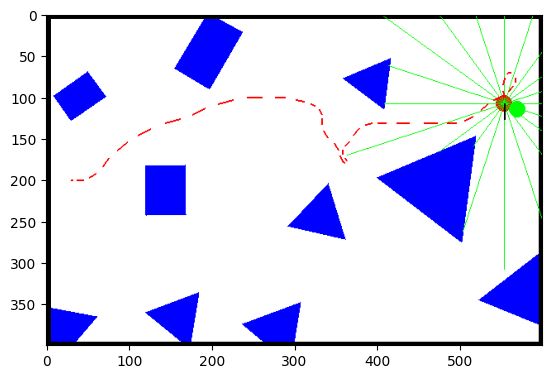

Episode 717	Average Score: 116.79Goal reached! Vel:  12.73239517211914


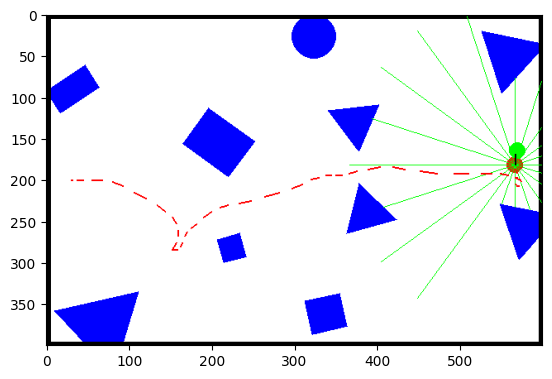

Episode 720	Average Score: 119.59Goal reached! Vel:  22.95365333557129


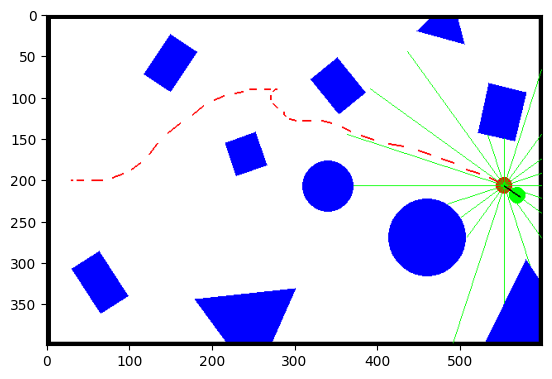

Episode 722	Average Score: 122.74Goal reached! Vel:  9.003165245056152


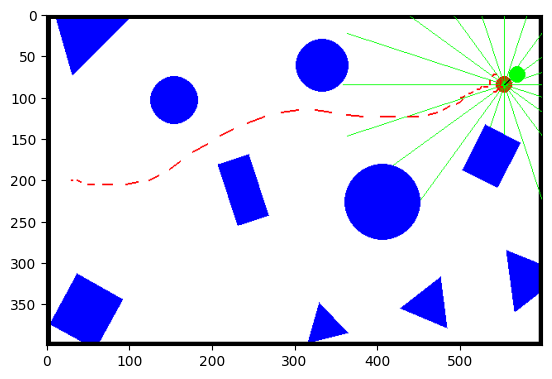

Episode 765	Average Score: 78.563Goal reached! Vel:  27.009489059448242


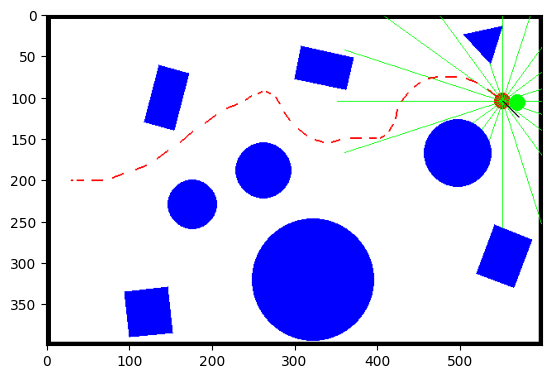

Episode 771	Average Score: 79.39Goal reached! Vel:  9.003165245056152


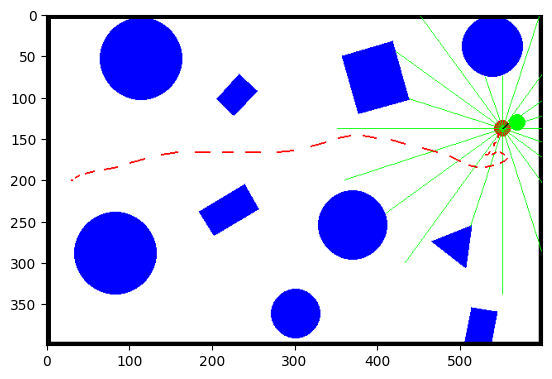

Episode 800	Average Score: 80.69

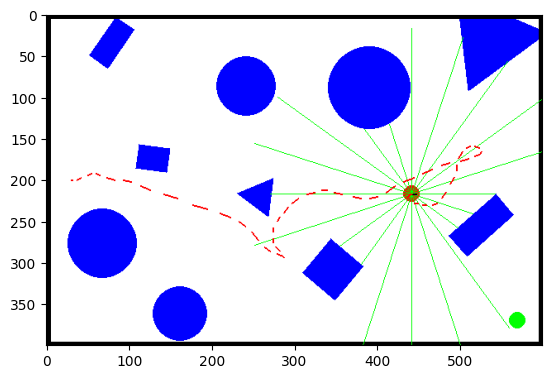

Episode 800	Average Score: 80.69, Eps: 0.018, Terminal vel: 6.366, angle:0.00, dist2goal: 9.94, ang2goal: -0.87, step: 99
Episode 852	Average Score: 68.31Goal reached! Vel:  22.95365333557129


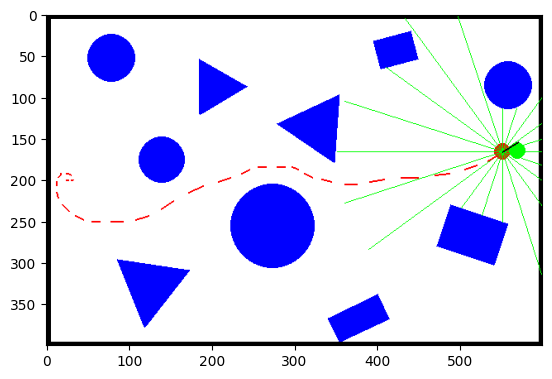

Episode 900	Average Score: 31.74

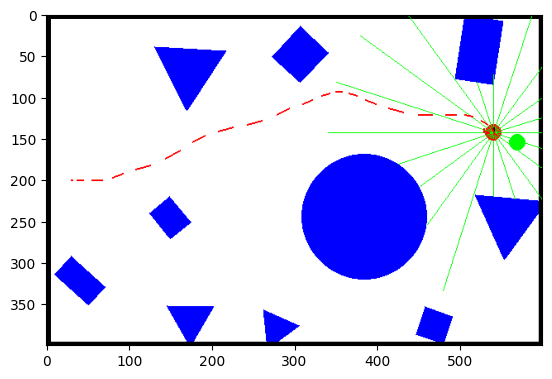

Episode 900	Average Score: 31.74, Eps: 0.011, Terminal vel: 6.366, angle:0.00, dist2goal: 1.53, ang2goal: -0.40, step: 99
Episode 903	Average Score: 33.45Goal reached! Vel:  22.95365333557129


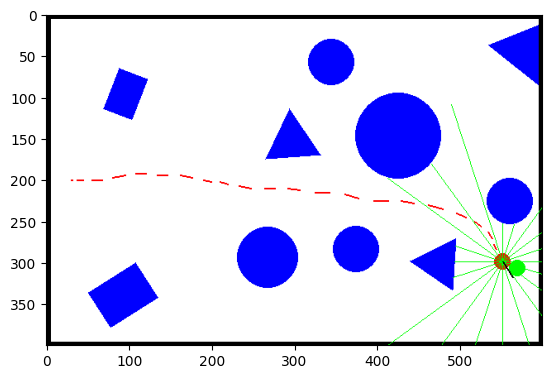

Episode 920	Average Score: 45.59Goal reached! Vel:  26.248510360717773


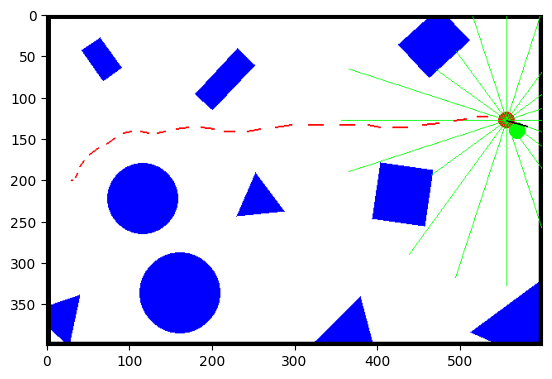

Episode 922	Average Score: 48.54Goal reached! Vel:  12.732398986816406


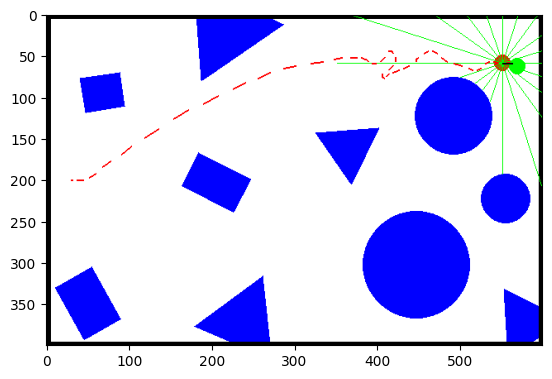

Episode 932	Average Score: 51.05Goal reached! Vel:  31.830991744995117


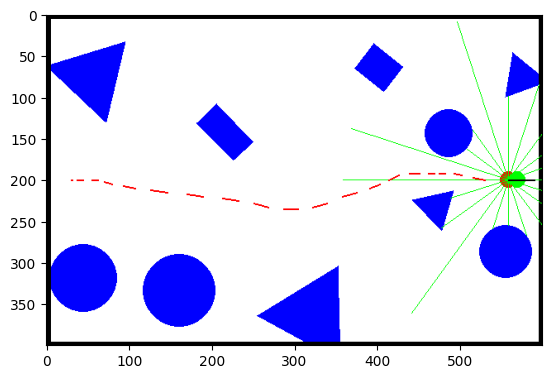

Episode 966	Average Score: 87.18Goal reached! Vel:  14.235254287719727


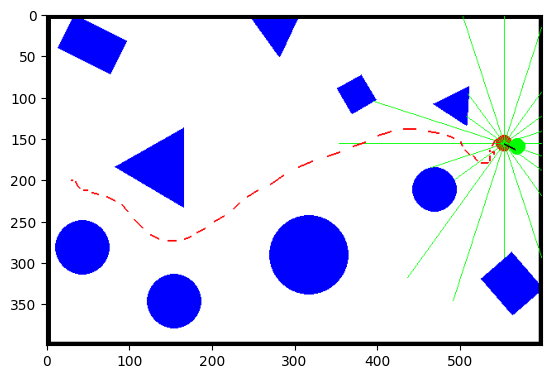

Episode 983	Average Score: 111.00Goal reached! Vel:  31.83098602294922


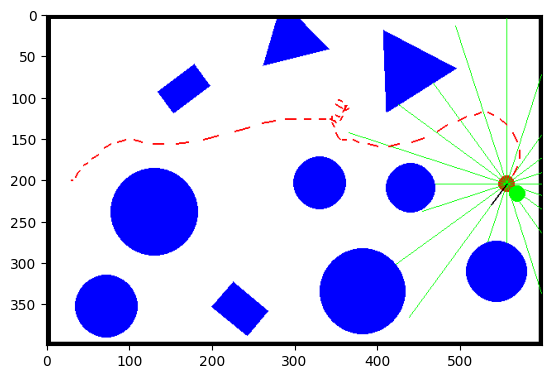

Episode 986	Average Score: 115.65Goal reached! Vel:  6.366201400756836


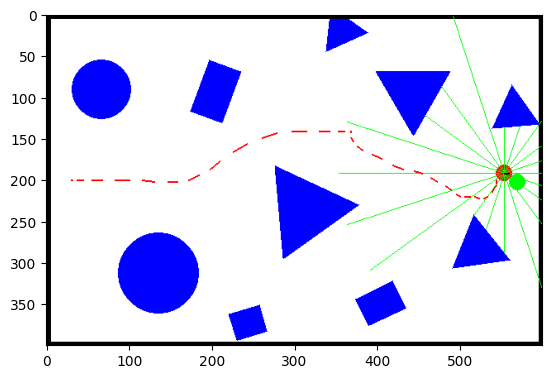

Episode 1000	Average Score: 107.97

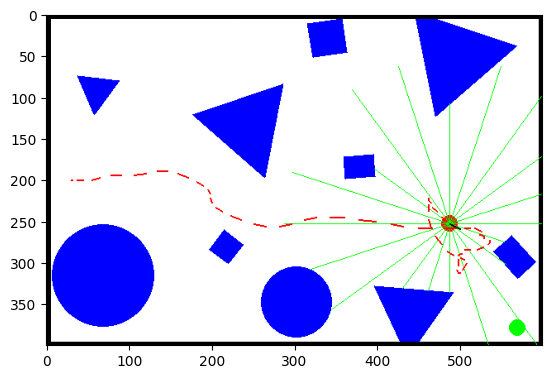

Episode 1000	Average Score: 107.97, Eps: 0.010, Terminal vel: 14.235, angle:0.00, dist2goal: 7.49, ang2goal: -0.99, step: 99
Episode 1006	Average Score: 101.33Goal reached! Vel:  9.00316333770752


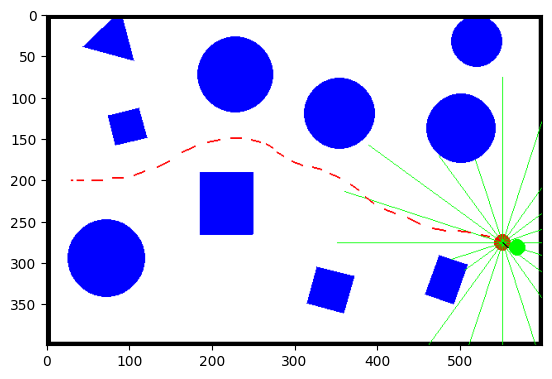

Episode 1008	Average Score: 97.163Goal reached! Vel:  20.13168716430664


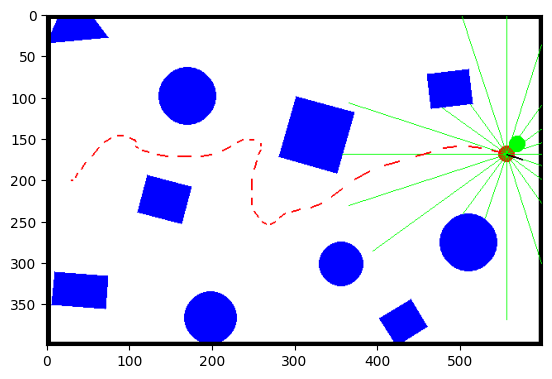

Episode 1010	Average Score: 95.48Goal reached! Vel:  28.470504760742188


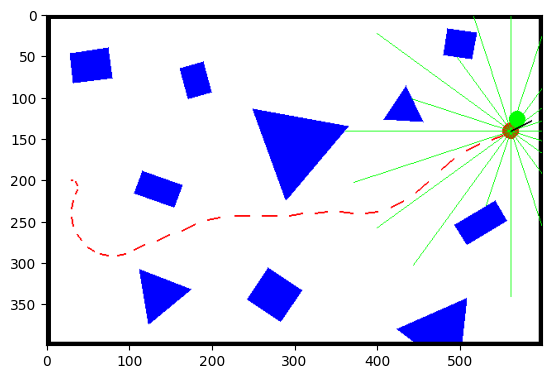

Episode 1026	Average Score: 90.31Goal reached! Vel:  19.09859275817871


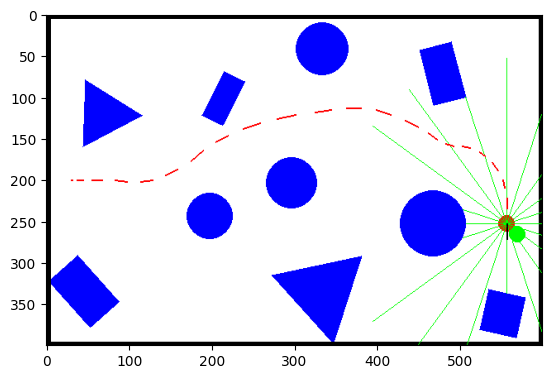

Episode 1041	Average Score: 75.11Goal reached! Vel:  14.235254287719727


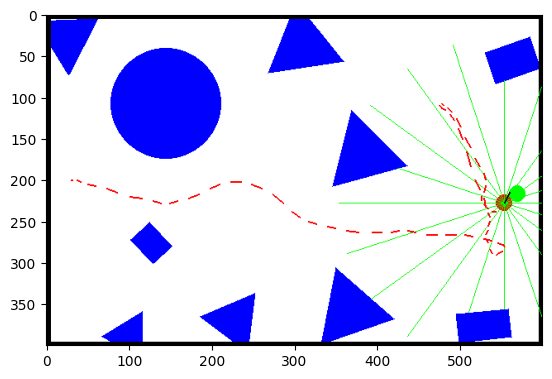

Episode 1052	Average Score: 66.18Goal reached! Vel:  18.006328582763672


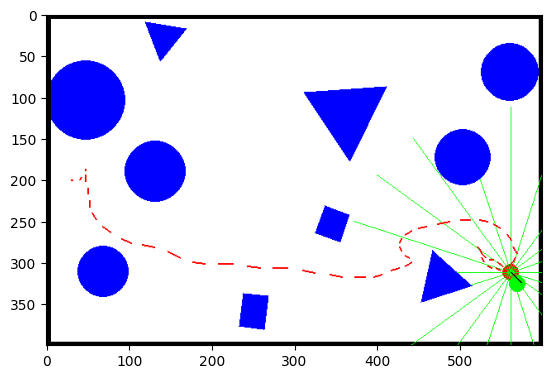

Episode 1058	Average Score: 73.88Goal reached! Vel:  18.006328582763672


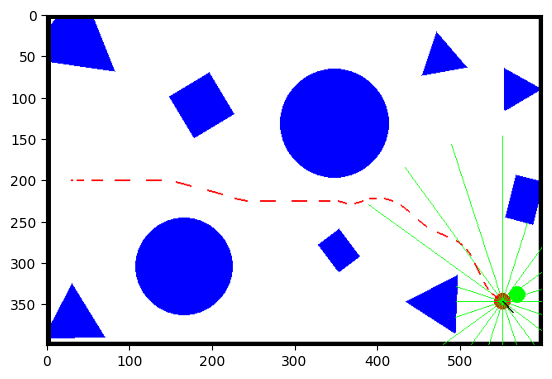

Episode 1100	Average Score: 69.83

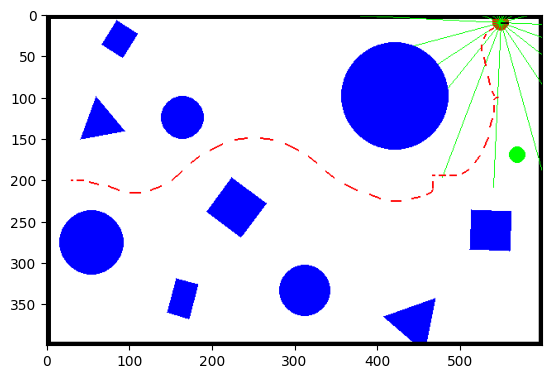

Episode 1100	Average Score: 69.83, Eps: 0.010, Terminal vel: 8.460, angle:0.27, dist2goal: 8.06, ang2goal: -1.72, step: 77
Episode 1130	Average Score: 66.07Goal reached! Vel:  6.366201400756836


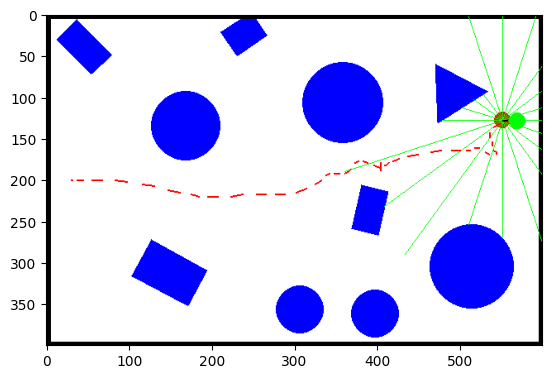

Episode 1145	Average Score: 75.72Goal reached! Vel:  9.003165245056152


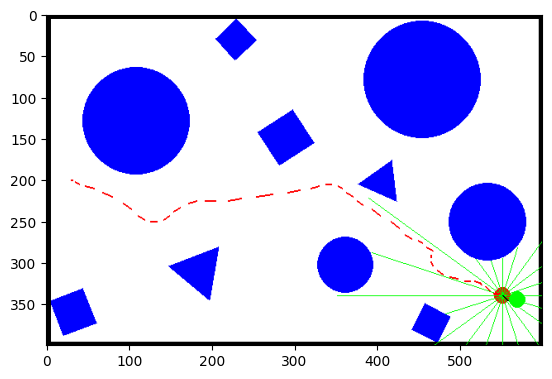

Episode 1178	Average Score: 81.72Goal reached! Vel:  14.235252380371094


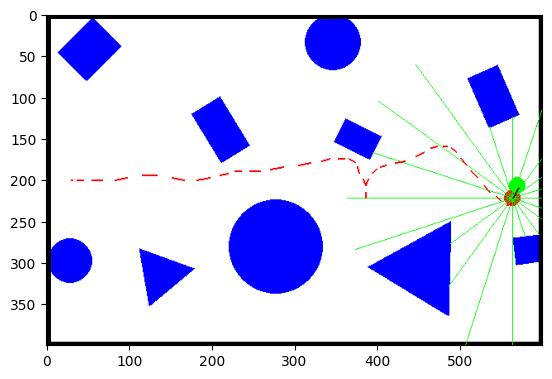

Episode 1180	Average Score: 81.03Goal reached! Vel:  18.00632667541504


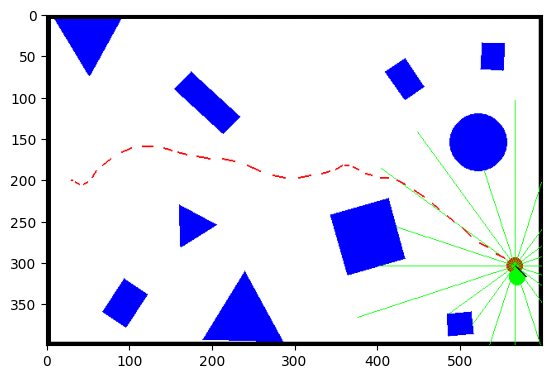

Episode 1186	Average Score: 76.87

KeyboardInterrupt: 

In [4]:
# Make an environment
env = SimpleUAVEnv()
state_size = STATE_SPACE
action_size = ACTION_SPACE

# Initilize a DQN agent
agent = DQNAgent(state_size, action_size, learning_rate=0.001)

# Train it
scores, final_states_images = train(agent, env, 2000, n_max_step=100, print_every=100)

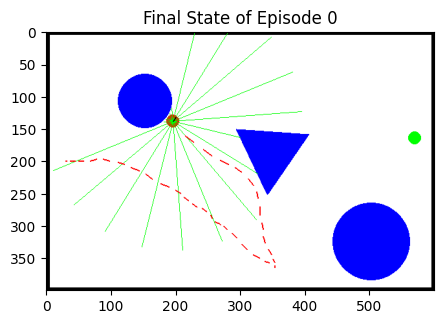

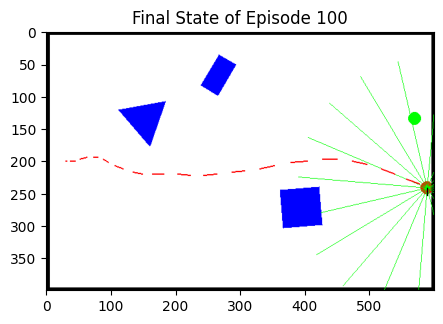

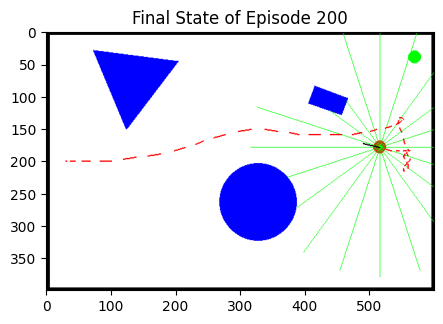

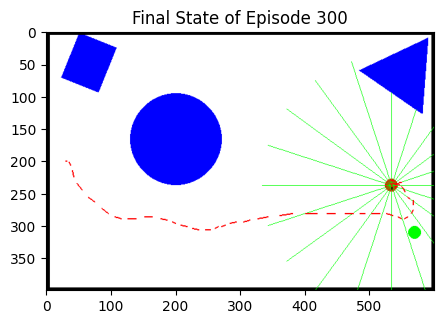

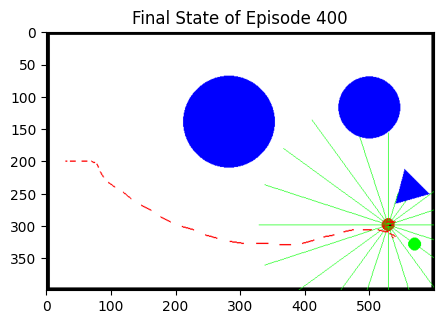

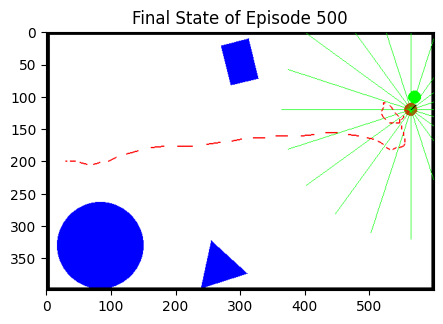

In [ ]:
# Plotting the final states
for i, img in enumerate(final_states_images):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Final State of Episode {i*100}')
    plt.show()